In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# A Convolutional Exploration - technical report
_Gus Ostow_

My goal was never to change the world with my capstone, not even to put together a novel analysis or model. All I wanted was to build a rock solid set of specialized skills. I set out to replicate and understand state of the art neural network models on the CIFAR-10 image classification benchmark. The task leaves little room for innovation; human level accuracy has already been surpassed, which is fine. The project was ideal to bring me to the forefront of research. 

## CIFAR-10

Data scientists never stop whining about how the majority of their time is spent collecting data, extracting data, cleaning data, munging data, aka "eating shit", with only a sliver of time left for juicy modeling. Well, not in my case. I chose to work with a popular premade dataset. CIFAR-10 consists of 60,000 tiny (32 x 32) images in ten different class categories. Classes are: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. More information on the CIFAR image datasets can be found at https://www.cs.toronto.edu/~kriz/cifar.html.


<img src="images/1.png",width=450,height=150, align = left>


## Convolutional Neural Networks - Overview

Convolutional neural networks have been around for awhile, neural networks even longer. CNNs proved their merit to the world only very recently. In 2012, Krizhevsky et al. rendered conventional computer vision techniques obsolete. His eponymously named AlexNet outperformed all previous best efforts on ImageNet, a popular benchmark. Deep convolutional neural networks trained on GPUs are the new paradigm.

Image classification is tough. Classes are not linearly separable in pixel space. Images of cars vary in infinite ways. A car is still a car regardless of lighting, orientation, blur, or any other low-level visual feature. Most machine learning algorithms are hopeless at picking out the invariance of object categories.  

Convolutional neural networks are deeply hierarchical functions designed to transform messy pixels into something easier to classify. A vanilla convolutional network is composed of three types of layers: 

1. convolutional 
2. pooling
3. fully connected. 

**Convolutional**

The convolutional layer is the backbone of the architecture. It assess the similarity between an input and a learned set of filters (in the form of connection weights). Imagine a small, square matrix(the filter) sliding step by across an image. At every step, you dot (sum of elementwise products) the sliding filter with the tiny region of the image currently below it. That result is a measure of likeness between the filter and that region, which is then stored as a single number in the output volume. A single slice of the feature map visualizes the regions of the scene that match the filter that produced it.  

Several hyperperameters tune the behaviors of a convolution layer.
size of the filter matrix 
Number of filters, which determines to the depth of output volume
stride length, which is how far the filter slides every step. 
Zero padding. This surrounds the input with a frame of zeros, which helps the filter size and the the stride hyperperameters play nice with the input and desired output dimensions.

These four hyperperameters and the input image size dictate the dimensions of the output volume. 
Output depth is equal to the number of filters
Assuming square input and filter (which is typically the case), The length and width are equal to (input_length - filter + 2 * padding) / stride + 1. You can convince yourself of this geometrically if you look at some diagrams.   

For networks that use pooling layers for spatial compression, the convention is to design convolutional layers that do not change the length and width of their inputs. Filter sizes of 3x3, or 5x5 with stride of 1 with paddings of 1 or 2 respectively are the standard hyperparameters to ensure that dimensions do not get compressed. Note: some  

**Pooling**

Pooling layers compress the size of feature volumes. They usually separate successive convolutional layers. Compression squishes a pixel space into a lower-dimensional feature space, more amenable to linear separation. 

Pooling operates on small square regions of its input. It outputs one activation (usually the max), then strides to the next spot. A 2x2 pooling filter with a stride of 2, would take only one of every four activations from the feature map slice, so it compresses it to 25% of its original size.

The size of a pooling filter, which activation it outputs, and the stride-length are all design decisions. The pooling operation most commonly chooses the max activation, but it could take the mean, median,sum,  etc. 

A criticism of max pooling is that it reduces the size of feature maps too aggressively. Pooling layers cannot be used very often in very deep networks because they will totally collapse feature map dimensions. The smallest possible square pooling filter is 2x2, which already discards 75% of the information. Alternatives are overlapping pooling regions with strides smaller than the filter, or proposed fractional pooling techniques. 

An alternative to pooling layers altogether, is to down sample with the convolutional layers themselves, by upping the stride length. Recall that the output volume dimensions depend on the stride. Larger stride, smaller output. Although it is convention to save all downsampling for pooling layers, research has shown that conv layers can take on the compression role without accuracy suffering. 

**Fully-connected**

CNNs usually end with a few final fully connected layers, which have the same architecture as densely connected feed forward layers. Every node connects to every other node in the adjacent layers. Fully connected layers transform the convolutional code vector — the result of successive convolutions and pooling — into classification scores. 


## Model Selection

Convolutional neural networks have proven themselves as the state of the art for image tasks. I didn't need to think hard about what tool would be best for classifying the CIFAR-10 dataset. Despite preordained success, I did not start with CNNs. Much of the knowledge base I needed still relied on universal principles of neural networks. Starting simple was the smart thing to do. I chose this project to learn about neural nets, not to break world records.

Fully connected feed-forward networks have limited potential for image classification tasks. I would graduate to CNNs once I exhausted that potential. 

I used Keras to build my models. [Keras](https://keras.io/) is a neural network package that runs on top of a numerical computation backend (either TensorFlow or Theano). TensorFlow's automatic differentation and tensor operations makes neural networks easy, with Keras on top of TensorFlow it's downright accessible. A simple network only takes a few lines, not many more than fitting a model in Sklearn. 

## Feed forward (FFN)

Even though it is trivial to build a model end-to-end in Keras, an effective model still takes thought. Even simple feed forward networks involve scores of hyperparameter choices. A quick list: network topology, optimizer, learning rate and other optimizer parameters, activation function, regularization, weight initialization, and more.

I will briefly give an overview of the more essential design decisions that go into a FFN.

**Topology - **
How many layers deep is the network? How many unit wide are the layers? Topology dictates the network's representational complexity.

**Optimizer - **
The optimizer updates the model parameters, or weights, based on minimizing the loss function. The loss function measures the model's performance with respect to its weights. It is zero for a perfect model. The central question of the optimizer: how can I change the model weights to minimize loss? Optimizers answer that question by using the gradient, which can be interpreted as the direction of steepest ascent on the loss function. Update the parameters in the direction of steepest descent and your are one step toward minimizing the loss function and training your model. 
Stochastic gradient decent is the most generic optimizer, others are AdaGrad, RmsProp, and Adam. 

** Activation Function - ** 
A neural network performs a series of linear transformations upon an input vector. Each successive transformation takes the output of the previous as its input. Matrix multiplication can compose multiple linear transformations into a single matrix. Why then are the many transformations of a neural network more powerful than the single transformation performed by linear classifiers? Neural networks derive their representational power from an element-wise function applied after every linear transformation. Many linear transformations are no longer mathematically equivalent to a single composition. Common activations are sigmoid, tanh, ReLu, and softmax.   

**Regularization - **
Neural networks are low-bias models. They excel at capturing the complexities of the training data. Their power naturally renders them vulnerable to memorizing the data. A model has overfit when it is excels at its training data, while unable to generalize its abilities to fresh situations. Overfitting is a perennial problem. How do you modulate complexity when it is the very quality necessary for performance in the first place? One answer is traditional regularization methods such as Ridge or Lasso, which penalize complexity during optimization. Another solution, unique to neural nets, is dropout. Dropout randomly drops units during training, but tests on a full network. The result is akin to an ensemble. 

Piles of training data are the antidote to overfitting. Data augmentation is an option when these data are limited. Randomly perturbing training artificially inflates the training set. In the case of images, it is common to randomly translate, rotate, and flip training data. 

--

How does a beginner make sense of so many degrees of freedom? I started simple and incrementally tweaked a hyperparameter until performance stopped improving, then moved on to the next. By the end of my FFN exploration, I had trained over fifty models. The gruesome details aren't informative. I'll share only a rough sketch of my process. 

### Getting into the code

I couldn't dive into training models right away. I needed a rigorous methodology for tracking each model's performance, saving it, saving it's weights, etc. 

I wanted to save things like performance information, # of parameters, # of layers, time, optimizer information, etc as a CSV. Meta-data like that is invaluable for my exploration hyperparameter space. Keras offers limited logging functionality, so I adapted its callback class to accomplish what I wanted. My custom callback can be found in "custom_callbacks/customcalls.py". 

Below is one example of an FFN script. The network has three hidden layers of 512 units activated by a ReLu non-linearity. The final activations are passed through a softmax to output a probability distribution over the ten image classes. 

In [ ]:
import numpy as np
from matplotlib import pyplot
from scipy.misc import toimage
import json

import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.regularizers import l2, activity_l2
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Activation
from keras.layers import Dense
from keras.layers import Dropout

#custom csv logger callback
from custom_callbacks.customcalls import CSVHistory

# ***************\\CHANGE MODEL NAME HERE EVERY RUN//***********************
# **************************************************************************
modelname = "ffn39" #used for logging purposes
# **************************************************************************

#set random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalize images
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255.0
X_test = X_test / 255.0


#reshape images to vectors
X_train = np.reshape(X_train, (50000, 3072))
X_test = np.reshape(X_test, (10000, 3072))

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#define model
model = Sequential()
model.add(Dense(512, input_dim=3072))
model.add(Activation("relu"))
#model.add(Dropout(0.02))

model.add(Dense(512))
model.add(Activation("relu"))
#model.add(Dropout(0.02))

model.add(Dense(512))
model.add(Activation("relu"))
#model.add(Dropout(0.02))

model.add(Dense(10))
model.add(Activation("softmax"))

"""
************************LOAD A MODEL FROM JSON*************************
Format for loading a saved model. Currently commented out. 
***********************************************************************
with open('./models/ffn19.json', 'rb') as fp:
    saved_model = json.load(fp)
model = model_from_json(saved_model)
"""

# COMPILE
epochs = 50
lrate = 0.5
decay = lrate/epochs #automatic learning rate annealment
sgd = SGD(lr=lrate, decay = decay,momentum = 0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#CALLBACKS
board = keras.callbacks.TensorBoard(log_dir="logs/" + modelname, histogram_freq=0, write_graph=True, write_images=False)
csv = CSVHistory("csv_logs/log_ffn_adam.csv", modelname, separator = " , ", append = True)

#FIT
fit = model.fit(X_train, y_train, validation_data = (X_test, y_test), nb_epoch=epochs, batch_size=32, shuffle = True, callbacks = [board, csv])

#save model to json
with open("models/" + modelname + ".json", 'wb') as fp:
    json.dump(model.to_json(), fp)

#save weights
model.save_weights("weights/" + modelname + ".hdf5")

### FFN results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Below is the validation, or test, accuracy of every feed forward network I trained. The bottom axis is epoch number (analogous to time spent training). Performance varied: some models didn't failed to launch by not even surpassing 10% accuracy (on a classification task with ten choices). Other models performed erratically. Most smoothly converged to the 50-55% accuracy level, which appears to be the ceiling for FFN performance on image classification. Recall that FFNs aren't well suited for such tasks.   

<img src="images/2.png",width=750,height=375, align = left>


Network topology was an obvious first knob to turn. A network's bias is largely dependent depth (number of layers) and breadth (number of units in each layer. 

My first network didn't have any hidden layers, essentially a linear classifier, achieved 20% validation accuracy on CIFAR-10. As a baseline, the first network represents what traditional machine learning algorithms have to offer for image classification benchmarks -- not much. 

Next, I gradually deepened the network until it no longer benefited performance. Below is the code for to load and view the metadata for training densily connected layers of various depths.

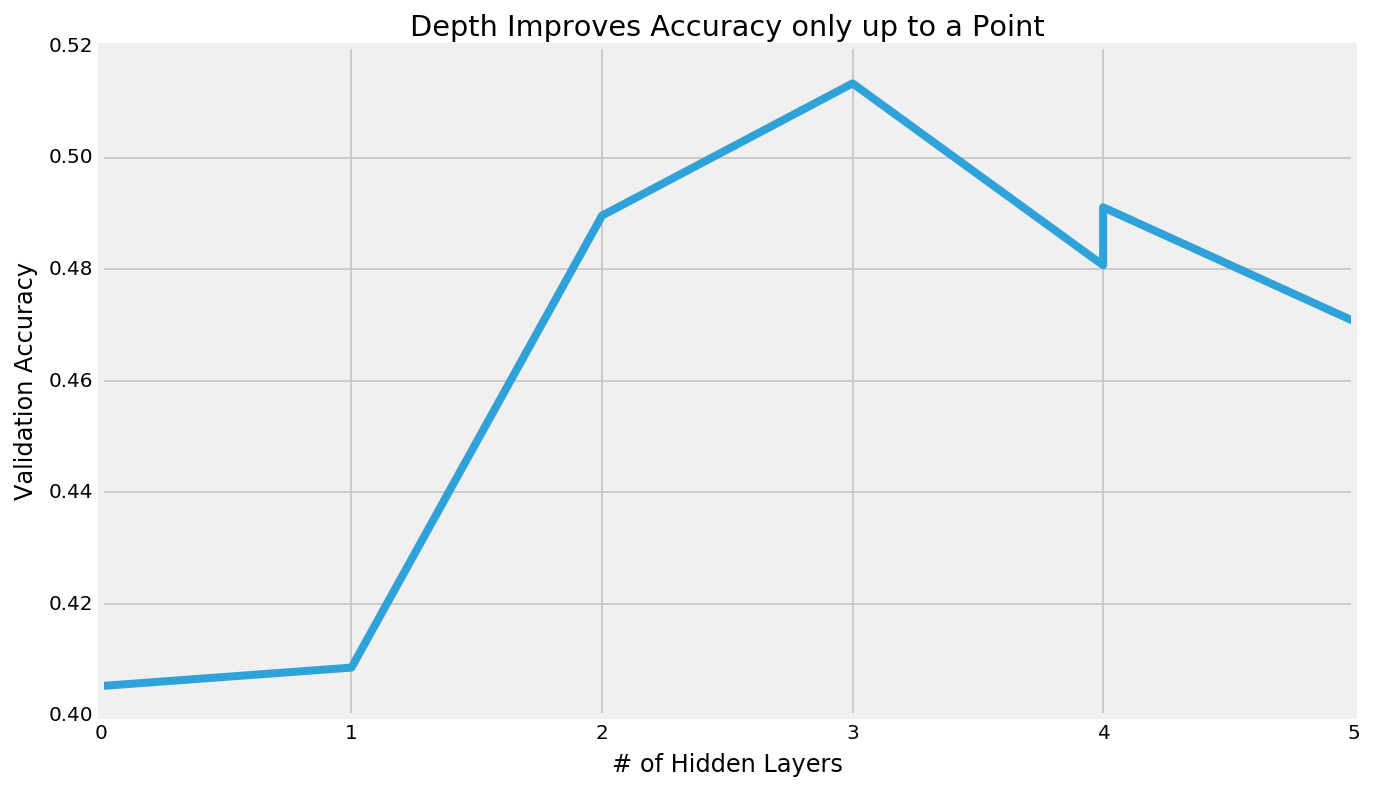

In [3]:
depthcharts = pd.read_csv("../csv_logs/ffn_depthcharts.csv")

#helper function to count number of layers from a text string
count_layers = lambda x: len(x.split(","))
depthcharts["depth"] = depthcharts["layers"].map(count_layers)
depthcharts["depth"] = depthcharts["depth"] - 1 #subtract one from depth to calculate # hidden layers

#group by model to display the epoch with best performance
depthcharts_group = depthcharts.groupby("model")["val_acc", "acc", "param_count", "depth"].max()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(depthcharts_group["depth"], depthcharts_group["val_acc"])
ax.set_xlabel('# of Hidden Layers')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Depth Improves Accuracy only up to a Point')
plt.show()

Performance improves with depth, until it peaks at three hidden layers, then declines after. 

I next investigated alternative optimizers to stochastic gradient descent. Adam is the current state of the art. 

In [ ]:
"""
PLOTS THAT NEED TO BE CREATED
- # of parameters vs performance
- training vs test acc
- Some comparison of Adam vs SGD
    - show that adam contributes to overfitting (improves traing performance hurts test performance)
"""

## Moving on to CNNs

My time had come to understand and replicate the best efforts at image classification. Several well-known networks standout as valuable learning opportunities to replicate.

**VGG - ** 
Showed that increasing depth with convolutional layers with small filter sizes improves performance.

**Strided convolutions - **
Questions the architectural assumption that dedicated pooling layers are necessary.

**ResNet - **
Solves the "degradation problem" of training very deep networks. 



Training neural networks is computationally expensive. I managed to (slowly) train the feed forward networks on my laptop, but the necessary time for very deep CNNs would be prohibitive. Instead I ran my code on an AWS GPU instance. Below is example code for a two layer VGG style network. The original VGG net was designed for the much larger images of the ImageNet benchmark. I had to make design to decisions to adapt it to the 32x32 CIFAR images. 

In [ ]:
import numpy as np
import json
from contextlib2 import redirect_stdout

import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from custom_augmentation import image_alt

from keras.optimizers import SGD
from keras.regularizers import l2, activity_l2
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Activation
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from custom_callbacks.customcalls import CSVHistory

# ***************\\CHANGE MODEL NAME HERE EVERY RUN//***********************
# **************************************************************************
modelname = "vgg7.1" #used for logging purposes
# **************************************************************************

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#normalize images
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train / 255.0
X_test = X_test / 255.0

#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#CALLBACKS
board = TensorBoard(log_dir="logs/" + modelname, histogram_freq=0, write_graph=True, write_images=False)
checkpoint = ModelCheckpoint("weights/" + modelname + ".hdf5", monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=0, mode='auto')
csv = CSVHistory("csv_logs/log_cnn_v1.csv", modelname, separator = " , ", append = True)

#DEFINE MODEL
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(32,32,3)))
model.add(Convolution2D(32,3,3))
model.add(Activation("relu"))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64,3,3))
model.add(Activation("relu"))

model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# ************************LOAD WEIGHTS*************************

model.load_weights("weights/vgg7.hdf5", by_name=False)

# ***********************************************************************

# COMPILE
epochs = 30
batch_size = 32
lrate = 0.0001
sgd = SGD(lr=lrate, decay = 0.0, momentum = 0.9, nesterov=True)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

data_augmentation = True

print model.summary()

with open("models/" + modelname + ".json", 'wb') as fp:
    json.dump(model.to_json(), fp)

with open("summaries/" + modelname + '.txt', 'w') as f:
    with redirect_stdout(f):
        print model.summary()

if not data_augmentation:
    print 'Not using data augmentation.'
    model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs, batch_size= batch_size, callbacks = [board,checkpoint,early,  csv])
else:
    print 'Using real-time data augmentation.'

    # this will do preprocessing and realtime data augmentation
    datagen = image_alt.ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    datagen.fit(X_train)

    model.fit_generator(datagen.flow(X_train, y_train,
                            batch_size=batch_size),
                            samples_per_epoch=X_train.shape[0],
                            nb_epoch=epochs,
                            validation_data=(X_test, y_test),
                            callbacks = [board, csv])


model.save_weights("weights/" + modelname + ".hdf5")

### CNN Results

In [ ]:
"""
PLOTS THAT I NEED TO MAKE
- VGGnet depth
- VGGnet # of filters

- Strided convolutions vs max pooling
"""

## Visualizing CNN Activity

Several visualization techniques can help peer into the “black box” of convolutional neural networks. 

### Optimizing input images, instead of weights

For the purposes of training, a network's input is fixed, while its parameters are optimized. Some visualization approaches  flip that paradigm. The questions: what kinds of images illicit certain responses from a trained network? What can these relationships tell us about how the network functions? 

One technique is to generate an image that maximizes a certain class score by using gradient ascent. The result is as a psychedelic visualization of visual features that most set off a network. The same process can be applied to internal units of a network as well. 

Here are some example images that maximized certain filters from a network with three convolutional layers: 

**CONV 1**
    <td> <img src="images/saved_filters/conv1_filter_1.png" alt="Drawing" style="width: 250px;"/> </td>
    <td> <img src="images/saved_filters/conv1_filter_0.png" alt="Drawing" style="width: 250px;"/> </td>

**CONV 2**

**CONV 3**

These images were produced with code from the Keras github [page](https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py).

## Conclusions

My intention was not to classify images with world-accuracy. It was to learn how to classify images with world-class accuracy, which is a subtle and important distinction. My final project was about the journey, not the destination. I learned a lot about the gritty details of training neural networks, the sort of knowledge only available from hands-on tinkering. A more ambitious, "destination oriented", project never would have left me time to learn what I did.  

I achieved state of the art accuracy on CIFAR-10 [need to fill in the details once I have more results]. 

Now that I am armed with a solid understanding of convolutional networks in theory and practice, I'm ready to go out and do some damage. 

## Sources

He, K., Zhang, X., Ren, S., & Sun, J. (2015). Deep residual learning for image recognition. arXiv preprint arXiv:1512.03385.

Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. arXiv preprint arXiv:1502.03167.

Kingma, D., & Ba, J. (2014). Adam: A method for stochastic optimization. arXiv preprint arXiv:1412.6980.

Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
